# Initial look at the images

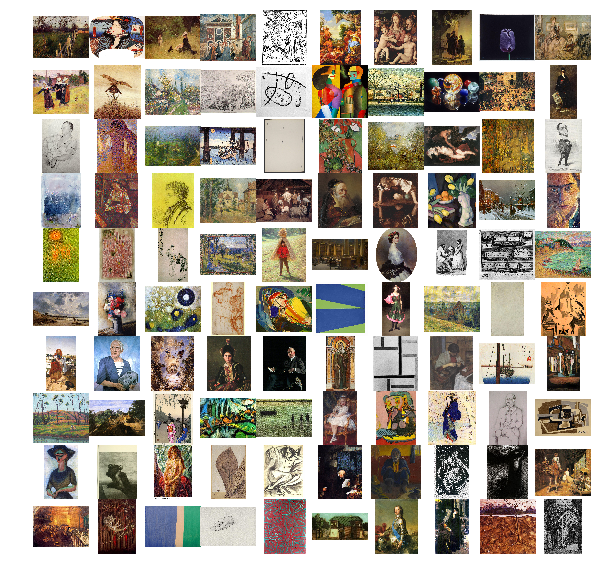

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageFilter
import random
import cv2
import os, glob

#t = pd.read_csv('../input/train_info.csv'); t.head()
#s = pd.read_csv('../input/submission_info.csv'); s.head()
train_files = [f for f in glob.glob("../data/train_1/*")]
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in train_files[:100]:
    im = cv2.imread(l)
   #  im = cv2.resize(im, (50, 50)) 
    plt.subplot(10, 10, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

# Dataset overview

In [31]:
t = pd.read_csv('../data/all_data_info.csv'); t.head()
# t['filename_int'] = t['new_filename'].str.split('.').str.get(0)
# t['filename_int'] = t['filename_int'].apply(pd.to_numeric)


,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


# # of paintings per style


Impressionism                   10643
Realism                         10523
Romanticism                      9285
Expressionism                    7013
Post-Impressionism               5778
Art Nouveau (Modern)             4899
Baroque                          4400
Surrealism                       4167
Symbolism                        3476
Rococo                           2733
Northern Renaissance             2379
Naïve Art (Primitivism)          2295
Abstract Expressionism           2074
Neoclassicism                    2038
Cubism                           1747
Ukiyo-e                          1426
Early Renaissance                1351
Mannerism (Late Renaissance)     1342
High Renaissance                 1314
Art Informel                     1267
Magic Realism                    1002
Abstract Art                      979
Academicism                       972
Color Field Painting              910
Pop Art                           791
Fauvism                           731
Lyrical Abst

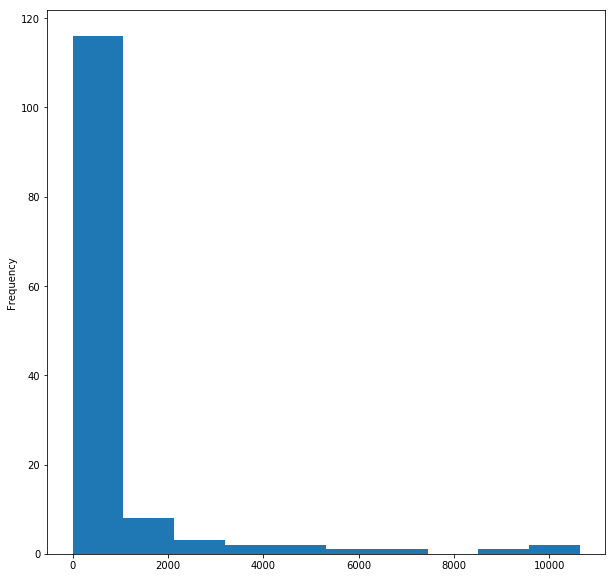

In [7]:
x = t['style'].value_counts()

# idxs = x < 200 # get indices of items that are < 200 to remove them

# x = x.drop(x.index[idxs])

x.plot(kind='hist')
print(x)

# # of paintings per style

# # of artists per style (e.g. how many impressionist artists)

# # of paintings by artist

John Singer Sargent                                              500
Ivan Shishkin                                                    500
Rembrandt                                                        500
Gustave Dore                                                     500
Giovanni Battista Piranesi                                       500
Pierre-Auguste Renoir                                            500
Ivan Aivazovsky                                                  500
Albrecht Durer                                                   500
Ilya Repin                                                       500
Zdislav Beksinski                                                500
Marc Chagall                                                     500
Pablo Picasso                                                    500
Martiros Saryan                                                  499
Camille Pissarro                                                 499
Paul Cezanne                      

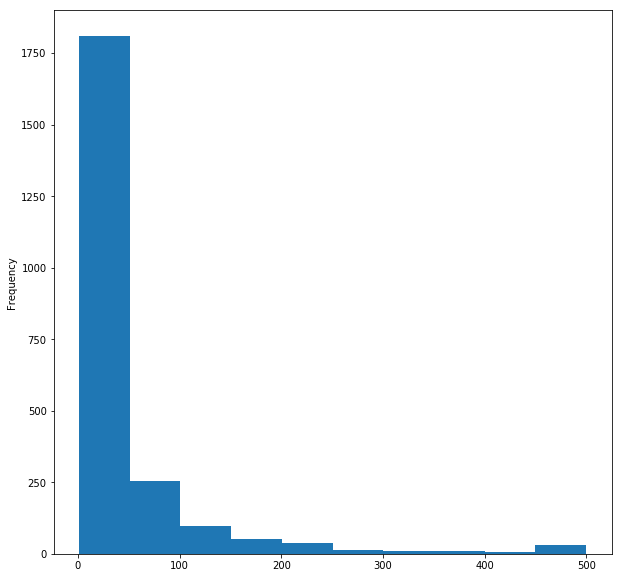

In [34]:
# of paintings by artist 
x = t['artist'].value_counts()

x.plot(kind='hist')
print(x)
# # of paintings per style

# # of artists per style (e.g. how many impressionist artists)

(180, 13)
(180, 13)
(20, 13)
(20, 13)


# Data processing TODOs
STYLE CLASSIFICATION:
1. filter down to just the styles with 1k+ images
2. Randomly sample 2k images from each (with a fixed seed! so it's same across runs)
3. Determine train/test/validation splits (80/10/10) - split each style so they are equally represented across all sets
4. Save 3 separate CVS with the lists of images in each split (to reuse)


ARTIST CLASSIFICATION:
1. filter down to just the artists with 450+(?) images
2. Randomly sample 2k images from each (with a fixed seed! so it's same across runs)
3. Determine train/test/validation splits (80/10/10) - split each artist so they are equally represented across all sets
4. Save 3 separate CVS with the lists of images in each split (to reuse)